# Adaptive RK

Let's run adaptive RK on  $u'=e^{t-u\sin u}$.

In [1]:
using FundamentalsNumericalComputation

In [2]:
f = (u,p,t) -> exp(t-u*sin(u))
ivp = ODEProblem(f,0,(0.,5.))

ODEProblem with uType Int64 and tType Float64. In-place: false
timespan: (0.0, 5.0)
u0: 0

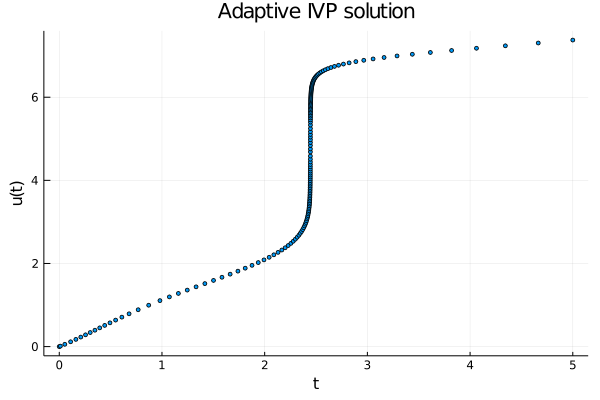

In [3]:
t,u = FNC.rk23(ivp,1e-5)

scatter(t,u,m=(:o,2),label="",
    xlabel="t",ylabel="u(t)",title="Adaptive IVP solution")

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

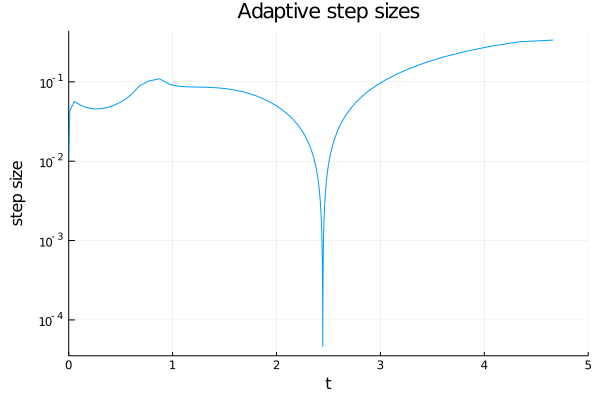

In [4]:
plot(t[1:end-1],diff(t),label="",
    xaxis=("t",(0,5)),yaxis=(:log10,"step size"),title="Adaptive step sizes")

If we had to run with a uniform step size to get this accuracy, it would be

In [5]:
h_min = minimum(diff(t))

4.6096854609878335e-5

On the other hand, the average step size that was actually taken was

In [6]:
h_avg = sum(diff(t))/(length(t)-1)

0.03205128205128205

We took fewer steps by a factor of almost 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.